In [1]:
# Function to ask the name of the user, respond with a welcome message, and give a small explanation about Open Food Facts
def welcome_user():
    # Ask for the user's name
    name = input("Please enter your name: ")
    
    # Respond with a welcome message
    print(f"Welcome, {name}!")
    
    # Give a small explanation about Open Food Facts
    explanation = """
    Open Food Facts is a free, open database of food products from around the world. 
    It provides detailed information about food products, including ingredients, nutritional facts, labels, and more.
    Users can contribute to the database by adding new products and updating existing ones.
    The goal of Open Food Facts is to promote transparency and help consumers make informed choices about the food they eat.
    """
    print(explanation)

# Call the function to execute it
welcome_user()


Please enter your name:  Marisa


Welcome, Marisa!

    Open Food Facts is a free, open database of food products from around the world. 
    It provides detailed information about food products, including ingredients, nutritional facts, labels, and more.
    Users can contribute to the database by adding new products and updating existing ones.
    The goal of Open Food Facts is to promote transparency and help consumers make informed choices about the food they eat.
    


In [3]:
import requests
import pandas as pd

# Function to get categories and number of products from Open Food Facts
def get_categories_and_products():
    # Define the URL for the categories endpoint
    url = "https://world.openfoodfacts.org/categories.json"
    
    # Define headers to mimic a regular browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    
    try:
        # Make the GET request to the API with headers
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the list of categories
        categories = data.get('tags', [])
        
        # Create a list to store the categories and number of products
        category_list = []
        
        # Loop through the categories and extract relevant information
        for category in categories:
            category_list.append({
                'Category': category.get('name', 'N/A'),
                'Number of Products': category.get('products', 0)
            })
        
        return category_list
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error occurred: {req_err}")
    except ValueError as json_err:
        print(f"JSON decode error: {json_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    
    return []

# Get the list of categories and number of products
categories_and_products = get_categories_and_products()

# Display a quick view message
print("Here is a quick view of the categories and number of products available in Open Food Facts")

# Convert the list to a pandas DataFrame
df = pd.DataFrame(categories_and_products)

# Display the DataFrame
print(df)



Here is a quick view of the categories and number of products available in Open Food Facts
                           Category  Number of Products
0   Plant-based foods and beverages              468172
1                 Plant-based foods              407386
2                            Snacks              282293
3                      Sweet snacks              207848
4                         Beverages              179166
..                              ...                 ...
95                             Teas               13848
96                            Wines               13739
97                           Waters               13435
98                  Meals with meat               13374
99                     Pasta dishes               13015

[100 rows x 2 columns]


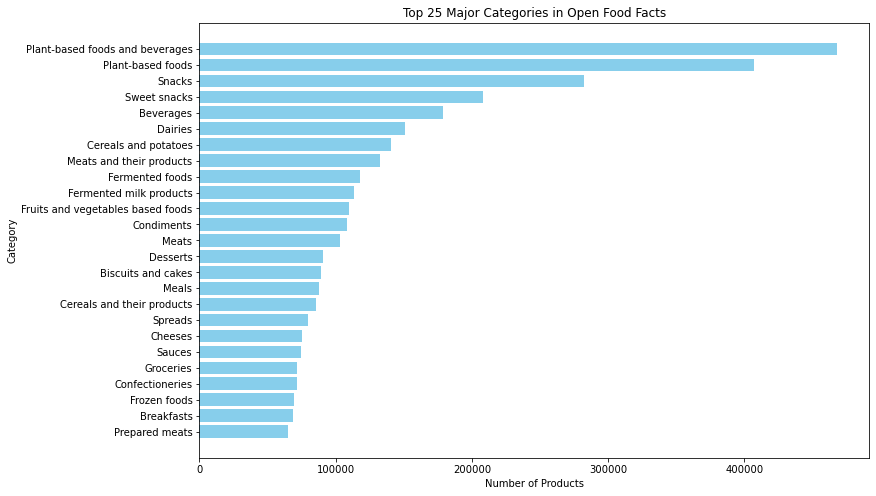

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to get the 25 major categories from Open Food Facts
def get_major_categories():
    # Define the URL for the categories endpoint
    url = "https://world.openfoodfacts.org/categories.json"
    
    # Define headers to mimic a regular browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    
    try:
        # Make the GET request to the API with headers
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the list of categories
        categories = data.get('tags', [])
        
        # Sort categories by number of products and get the top 25
        sorted_categories = sorted(categories, key=lambda x: x.get('products', 0), reverse=True)[:25]
        
        return sorted_categories
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error occurred: {req_err}")
    except ValueError as json_err:
        print(f"JSON decode error: {json_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    
    return []

# Get the 25 major categories
major_categories = get_major_categories()

# Convert the list to a pandas DataFrame
df = pd.DataFrame(major_categories)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(df['name'], df['products'], color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.title('Top 25 Major Categories in Open Food Facts')
plt.gca().invert_yaxis()  # Invert y-axis to have the category with the most products on top
plt.show()


In [11]:
import requests
import pandas as pd

# Function to get relevant information from Open Food Facts
def get_relevant_information():
    # Define the URL for the products endpoint
    url = "https://world.openfoodfacts.org/cgi/search.pl?action=process&json=true&page_size=100"
    
    # Define headers to mimic a regular browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    
    try:
        # Make the GET request to the API with headers
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the list of products
        products = data.get('products', [])
        
        # Create a list to store relevant information
        relevant_info_list = []
        
        # Loop through the products and extract relevant information
        for product in products:
            relevant_info_list.append({
                'Product Name': product.get('product_name', 'N/A'),
                'Brand': product.get('brands', 'N/A'),
                'Quantity': product.get('quantity', 'N/A'),
                'Nutri-Score': product.get('nutriscore_grade', 'N/A'),
                'NOVA Group': product.get('nova_group', 'N/A')
            })
        
        return relevant_info_list
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error occurred: {req_err}")
    except ValueError as json_err:
        print(f"JSON decode error: {json_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    
    return []

# Get the relevant information from Open Food Facts
relevant_information = get_relevant_information()

# Display a message
print("Here is some of the relevant information available:")

# Convert the list to a pandas DataFrame
df = pd.DataFrame(relevant_information)

# Display the DataFrame
print(df.tail(10))  # Display the first 10 rows for a quick view


Here is some of the relevant information available:
                                Product Name                   Brand  \
90                   Napolitain - L'original  LU,Napolitain,Mondelez   
91                           RICORE Original           Nestlé,Ricore   
92                            Badoit 1 L PET                  Badoit   
93                               FIGUE & SON                  GERBLE   
94                            Tomato Ketchup                   Heinz   
95                          pulpe de tomates             Mutti,POLPA   
96                         Pringles Original                Pringles   
97  Tartines craquantes quinoa - pois chiche              Jardin Bio   
98             Véritable Petit Beurre Pocket                      lu   
99                   Carré Frais 0% - Nature    Elle & Vire,Savencia   

            Quantity Nutri-Score NOVA Group  
90  180 g (6 x 30 g)           a          4  
91             100 g           e          4  
92               

In [15]:
# Function to explain briefly what is Nutri-Score
def explain_nutriscore():
    explanation = """
    Nutri-Score is a front-of-pack label that provides simplified nutritional information to help consumers make healthier food choices.
    It is a color-coded system that rates the overall nutritional quality of food products on a scale from A to E.
    The scale is as follows:
    - A (Green): Highest nutritional quality
    - B (Light Green)
    - C (Yellow)
    - D (Orange)
    - E (Red): Lowest nutritional quality
    
    Nutri-Score takes into account both positive and negative factors of the food product, such as:
    - Positive factors: Fiber, protein, fruits, vegetables, nuts, and legumes content
    - Negative factors: Energy (calories), saturated fat, sugars, and sodium content
    
    The goal of Nutri-Score is to promote transparency and help consumers make informed choices about the nutritional quality of the food they eat.
    """
    print(explanation)

# Call the function to execute it
explain_nutriscore()


    Nutri-Score is a front-of-pack label that provides simplified nutritional information to help consumers make healthier food choices.
    It is a color-coded system that rates the overall nutritional quality of food products on a scale from A to E.
    The scale is as follows:
    - A (Green): Highest nutritional quality
    - B (Light Green)
    - C (Yellow)
    - D (Orange)
    - E (Red): Lowest nutritional quality
    
    Nutri-Score takes into account both positive and negative factors of the food product, such as:
    - Positive factors: Fiber, protein, fruits, vegetables, nuts, and legumes content
    - Negative factors: Energy (calories), saturated fat, sugars, and sodium content
    
    The goal of Nutri-Score is to promote transparency and help consumers make informed choices about the nutritional quality of the food they eat.
    


Choose a category from the following options to find out the Nutri-Score:
1. Meats and their products
2. Plant-based foods
3. Snacks
4. Fruits
5. Cereals and their products


Enter the number corresponding to your choice or type 'Done' to finish:  3


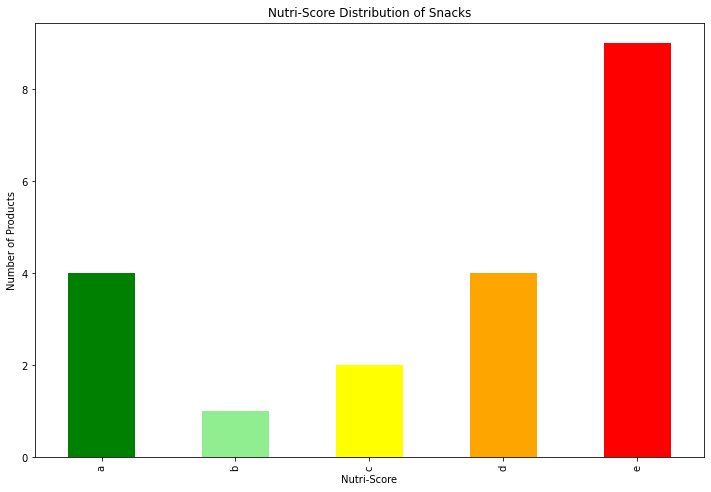

Choose a category from the following options to find out the Nutri-Score:
1. Meats and their products
2. Plant-based foods
3. Snacks
4. Fruits
5. Cereals and their products


Enter the number corresponding to your choice or type 'Done' to finish:  Done


Finished.


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to get a list of products in a given category
def get_products_by_category(category):
    # Define the URL for the category endpoint
    url = f"https://world.openfoodfacts.org/category/{category}.json"
    
    # Define headers to mimic a regular browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    
    try:
        # Make the GET request to the API with headers
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the list of products
        products = data.get('products', [])
        
        # Create a list to store the product names and Nutri-Scores
        product_list = []
        
        # Loop through the products and extract relevant information
        for product in products:
            product_list.append({
                'Product Name': product.get('product_name', 'N/A'),
                'Nutri-Score': product.get('nutriscore_grade', 'N/A')
            })
        
        return product_list
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error occurred: {req_err}")
    except ValueError as json_err:
        print(f"JSON decode error: {json_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    
    return []

# Function to plot Nutri-Score distribution with different colors
def plot_nutriscore_distribution(category):
    # Get the list of products in the given category
    products = get_products_by_category(category)
    
    # Convert the list to a pandas DataFrame
    df = pd.DataFrame(products)
    
    # Filter out products without a Nutri-Score
    df = df[df['Nutri-Score'] != 'N/A']
    
    # Define colors for each Nutri-Score grade
    colors = {
        'a': 'green',
        'b': 'lightgreen',
        'c': 'yellow',
        'd': 'orange',
        'e': 'red'
    }
    
    # Plot the data with different colors for each Nutri-Score grade
    plt.figure(figsize=(12, 8))
    df['Nutri-Score'].value_counts().sort_index().plot(kind='bar', color=[colors[score] for score in df['Nutri-Score'].value_counts().sort_index().index])
    plt.xlabel('Nutri-Score')
    plt.ylabel('Number of Products')
    plt.title(f'Nutri-Score Distribution of {category.replace("-", " ").title()}')
    plt.show()

# List of specific categories to choose from
categories = [
    {"id": "meats-and-their-products", "name": "Meats and their products"},
    {"id": "plant-based-foods", "name": "Plant-based foods"},
    {"id": "snacks", "name": "Snacks"},
    {"id": "fruits", "name": "Fruits"},
    {"id": "cereals-and-their-products", "name": "Cereals and their products"}
]

while True:
    # Display 5 options of categories to choose from
    print("Choose a category from the following options to find out the Nutri-Score:")
    for i, category in enumerate(categories):
        print(f"{i + 1}. {category['name']}")

    # Ask for a category choice from the user
    choice = input("Enter the number corresponding to your choice or type 'Done' to finish: ")
    
    if choice.lower() == 'done':
        print("Finished.")
        break
    
    try:
        choice = int(choice) - 1
        if choice < 0 or choice >= len(categories):
            raise ValueError("Invalid choice")
        
        # Get the selected category ID
        selected_category_id = categories[choice]['id']
        
        # Plot the Nutri-Score distribution for the selected category
        plot_nutriscore_distribution(selected_category_id)
    
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid number or type 'Done' to finish.")


In [18]:
# Function to explain briefly what is NOVA
def explain_nova():
    explanation = """
    NOVA is a food classification system that categorizes food products based on the extent and purpose of their processing.
    It was developed by researchers at the University of São Paulo in Brazil and is widely used in nutritional research and public health policies.
    
    The NOVA classification system divides food products into four groups:
    1. Unprocessed or minimally processed foods: These are natural foods that have undergone minimal processing, such as cleaning, cutting, or drying. Examples include fresh fruits, vegetables, nuts, seeds, and whole grains.
    2. Processed culinary ingredients: These are substances extracted from natural foods or obtained from nature that are used in cooking to prepare, season, and cook unprocessed or minimally processed foods. Examples include oils, butter, sugar, and salt.
    3. Processed foods: These are products made by adding salt, sugar, or other substances to unprocessed or minimally processed foods to preserve them or enhance their flavor. Examples include canned vegetables, fruits in syrup, cheeses, and freshly made bread.
    4. Ultra-processed foods: These are industrial formulations made entirely or mostly from substances extracted from foods (e.g., oils, fats, sugars, starches) or derived from food constituents (e.g., hydrogenated fats) with little or no whole food content. They often contain additives like preservatives, flavor enhancers, and colorings. Examples include soft drinks, packaged snacks, reconstituted meat products, and instant noodles.
    
    The goal of the NOVA classification system is to help consumers understand the level of processing in their food and make healthier choices by favoring less processed options.
    """
    print(explanation)

# Call the function to execute it
explain_nova()



    NOVA is a food classification system that categorizes food products based on the extent and purpose of their processing.
    It was developed by researchers at the University of São Paulo in Brazil and is widely used in nutritional research and public health policies.
    
    The NOVA classification system divides food products into four groups:
    1. Unprocessed or minimally processed foods: These are natural foods that have undergone minimal processing, such as cleaning, cutting, or drying. Examples include fresh fruits, vegetables, nuts, seeds, and whole grains.
    2. Processed culinary ingredients: These are substances extracted from natural foods or obtained from nature that are used in cooking to prepare, season, and cook unprocessed or minimally processed foods. Examples include oils, butter, sugar, and salt.
    3. Processed foods: These are products made by adding salt, sugar, or other substances to unprocessed or minimally processed foods to preserve them or enhance t

Choose a category from the following options to find out the NOVA group:
1. Meats and their products
2. Plant-based foods
3. Snacks
4. Fruits
5. Cereals and their products


Enter the number corresponding to your choice or type 'Done' to finish:  3


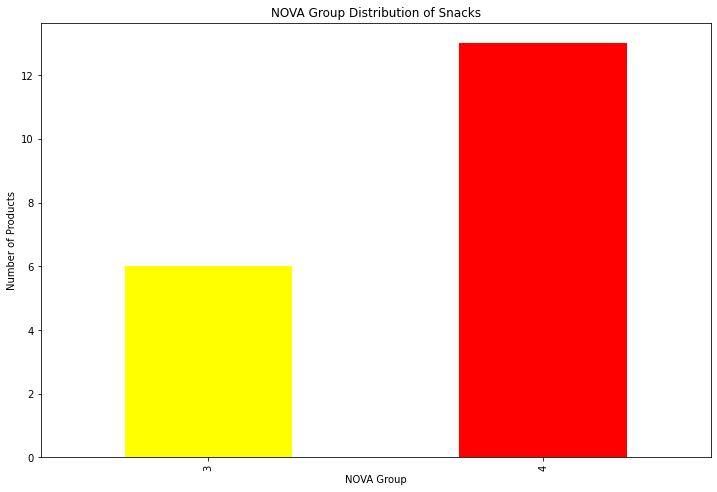

Choose a category from the following options to find out the NOVA group:
1. Meats and their products
2. Plant-based foods
3. Snacks
4. Fruits
5. Cereals and their products


Enter the number corresponding to your choice or type 'Done' to finish:  Done


Finished.


In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to get a list of products in a given category
def get_products_by_category(category):
    # Define the URL for the category endpoint
    url = f"https://world.openfoodfacts.org/category/{category}.json"
    
    # Define headers to mimic a regular browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    
    try:
        # Make the GET request to the API with headers
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        
        # Parse the JSON response
        data = response.json()
        
        # Extract the list of products
        products = data.get('products', [])
        
        # Create a list to store the product names and NOVA groups
        product_list = []
        
        # Loop through the products and extract relevant information
        for product in products:
            product_list.append({
                'Product Name': product.get('product_name', 'N/A'),
                'NOVA Group': product.get('nova_group', 'N/A')
            })
        
        return product_list
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error occurred: {req_err}")
    except ValueError as json_err:
        print(f"JSON decode error: {json_err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    
    return []

# Function to plot NOVA group distribution with different colors
def plot_nova_distribution(category):
    # Get the list of products in the given category
    products = get_products_by_category(category)
    
    # Convert the list to a pandas DataFrame
    df = pd.DataFrame(products)
    
    # Filter out products without a NOVA group
    df = df[df['NOVA Group'] != 'N/A']
    
    # Define colors for each NOVA group
    colors = {
        1: 'green',
        2: 'lightgreen',
        3: 'yellow',
        4: 'red'
    }
    
    # Plot the data with different colors for each NOVA group
    plt.figure(figsize=(12, 8))
    df['NOVA Group'].value_counts().sort_index().plot(kind='bar', color=[colors[int(group)] for group in df['NOVA Group'].value_counts().sort_index().index])
    plt.xlabel('NOVA Group')
    plt.ylabel('Number of Products')
    plt.title(f'NOVA Group Distribution of {category.replace("-", " ").title()}')
    plt.show()

# List of specific categories to choose from
categories = [
    {"id": "meats-and-their-products", "name": "Meats and their products"},
    {"id": "plant-based-foods", "name": "Plant-based foods"},
    {"id": "snacks", "name": "Snacks"},
    {"id": "fruits", "name": "Fruits"},
    {"id": "cereals-and-their-products", "name": "Cereals and their products"}
]

while True:
    # Display 5 options of categories to choose from
    print("Choose a category from the following options to find out the NOVA group:")
    for i, category in enumerate(categories):
        print(f"{i + 1}. {category['name']}")

    # Ask for a category choice from the user
    choice = input("Enter the number corresponding to your choice or type 'Done' to finish: ")
    
    if choice.lower() == 'done':
        print("Finished.")
        break
    
    try:
        choice = int(choice) - 1
        if choice < 0 or choice >= len(categories):
            raise ValueError("Invalid choice")
        
        # Get the selected category ID
        selected_category_id = categories[choice]['id']
        
        # Plot the NOVA group distribution for the selected category
        plot_nova_distribution(selected_category_id)
    
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid number or type 'Done' to finish.")
